In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

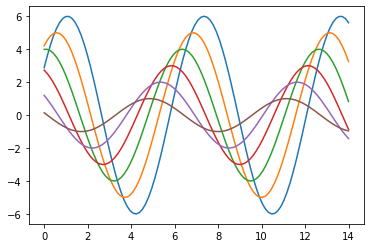

In [3]:
sinplot()

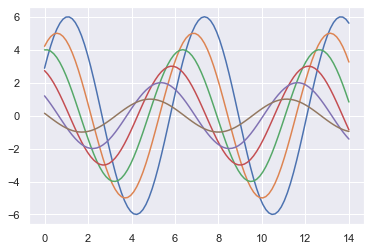

In [4]:
sns.set()
sinplot()

In [5]:
# 1 五种主题风格：darkgrid,whitegrid,dark,white,ticks

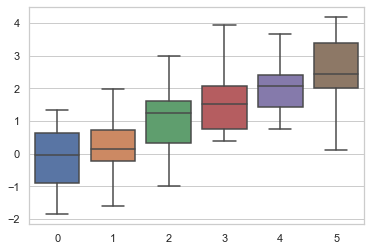

In [6]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20,6)) + np.arange(6)/2
sns.boxplot(data=data)

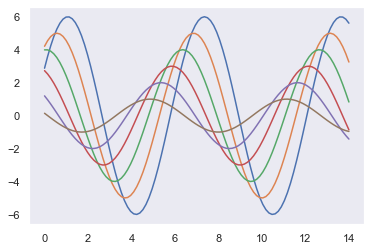

In [7]:
sns.set_style("dark")
sinplot()

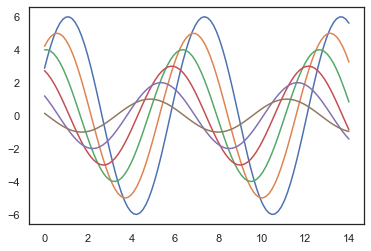

In [8]:
sns.set_style("white")
sinplot()

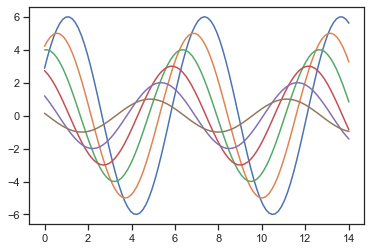

In [9]:
sns.set_style("ticks")
sinplot()

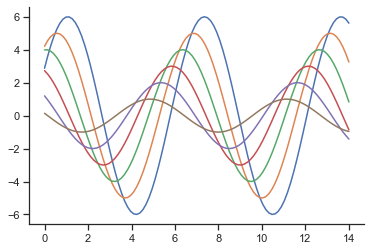

In [11]:
sinplot()
sns.despine()

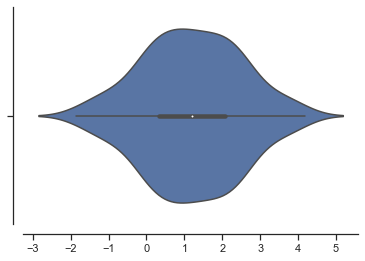

In [12]:
sns.violinplot(data)
sns.despine(offset=10) # offset:指定图离轴线的距离

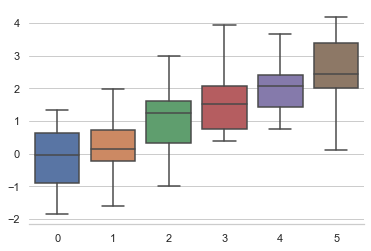

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=data,palette="deep")
sns.despine(left=True)

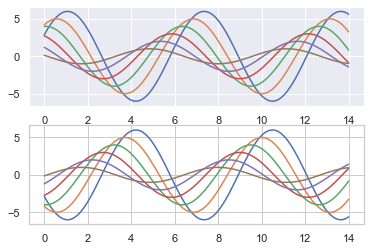

In [17]:
with sns.axes_style("darkgrid"): # 指定一个with域
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [18]:
sns.set()

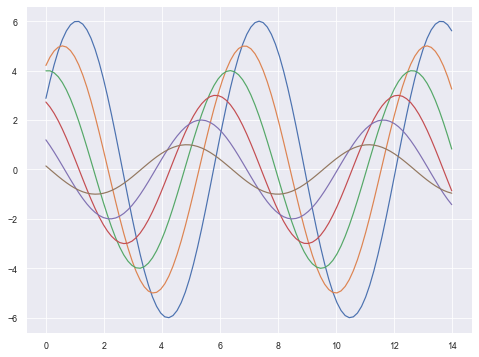

In [19]:
sns.set_context("paper") 
plt.figure(figsize=(8,6))# 设置画图域的大小
sinplot()

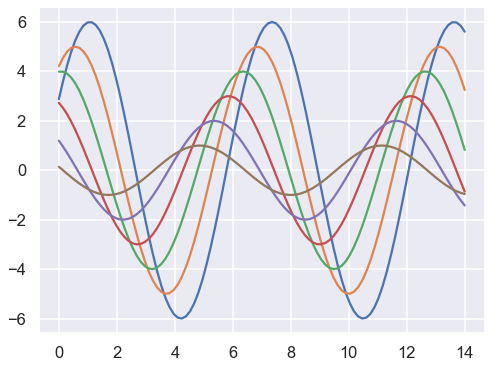

In [20]:
sns.set_context("talk") 
plt.figure(figsize=(8,6))# 设置画图域的大小
sinplot()

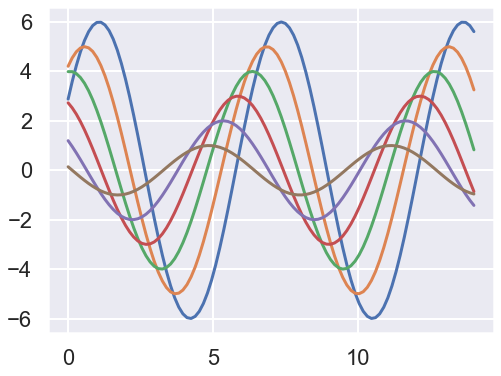

In [21]:
sns.set_context("poster") 
plt.figure(figsize=(8,6))# 设置画图域的大小
sinplot()

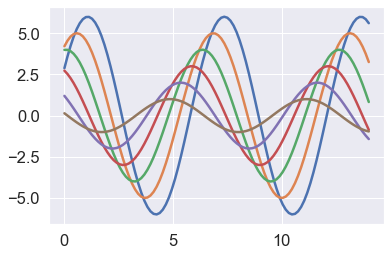

In [22]:
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
sinplot()# font_scale:字体大小，linewidth：线粗

In [23]:
# 2 调色板
# color_palette()能传入任何matplotlib支持的颜色,不写参数则默认颜色
# set_palette()设置所有图的颜色

sns.set(rc={"figure.figsize":(6,6)})


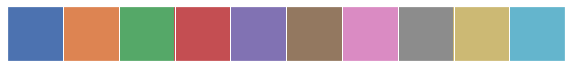

In [25]:
# 2.1 分类色板
current_palette = sns.color_palette()
sns.palplot(current_palette) # 默认色板颜色

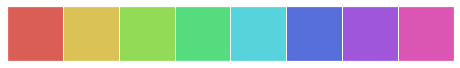

In [32]:
# 2.2 圆形画板
# 当你有留个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色
#（这样的色调会保持亮度和饱和度不变）
# 最常用的方法是使用his的颜色空间，这是RGB值的简单转换
sns.palplot(sns.color_palette("hls",8))

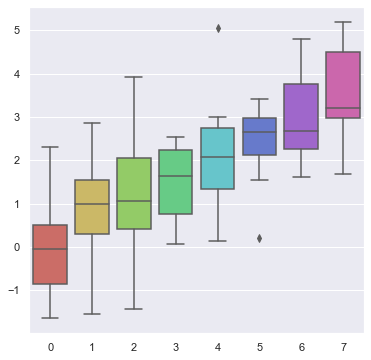

In [31]:
data = np.random.normal(size=(20,8))+np.arange(8)/2
sns.boxplot(data=data,palette=sns.color_palette("hls",8))

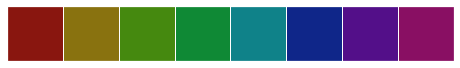

In [34]:
# 2.3画板颜色的亮度和饱和度
# l:亮度（lightness）
# s:饱和 saturation

sns.palplot(sns.hls_palette(8,l=0.3,s=0.8))

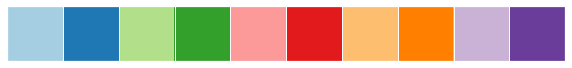

In [35]:
sns.palplot(sns.color_palette("Paired",10)) # 进行对比，一对一对的调色板

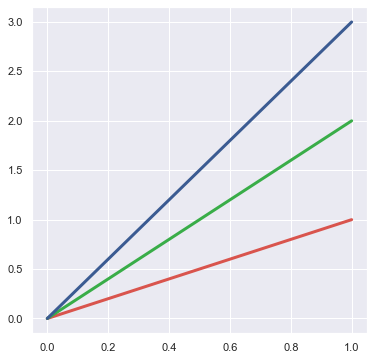

In [36]:
# 3 使用xkcd颜色来命名颜色
# xkcd包含了一套针对随机RGB的命名，产生了954个可以随时通过xkcd_rgb字典中调用的颜色命名
plt.plot([0,1],[0,1],sns.xkcd_rgb["pale red"],lw=3)
plt.plot([0,1],[0,2],sns.xkcd_rgb["medium green"],lw=3)
plt.plot([0,1],[0,3],sns.xkcd_rgb["denim blue"],lw=3)

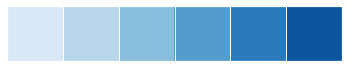

In [40]:
# 上面介绍的是离散的色板

# 2.4连续色板
# 色彩随数据变换

sns.palplot(sns.color_palette("Blues"))

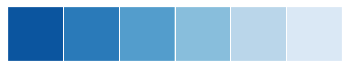

In [41]:
# 翻转渐变-->添加一个_r后缀
sns.palplot(sns.color_palette("Blues_r"))

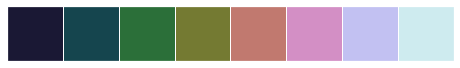

In [42]:
# 2.5 线性色板--->色调线性变换

sns.palplot(sns.color_palette("cubehelix",8))


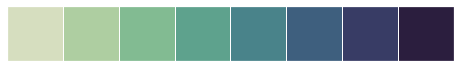

In [43]:
sns.palplot(sns.cubehelix_palette(8,start=0.5,rot=-0.75))

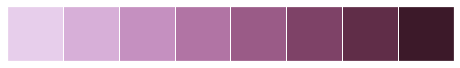

In [45]:
sns.palplot(sns.cubehelix_palette(8,start=0.75,rot=-0.150))

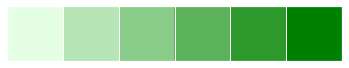

In [46]:
# 2.6 light_palette和dark_palette调用定制连续调色板

sns.palplot(sns.light_palette("green"))

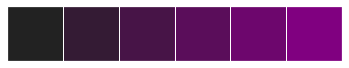

In [47]:
sns.palplot(sns.dark_palette("purple"))

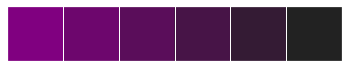

In [48]:
# 反转
sns.palplot(sns.dark_palette("purple",reverse=True))

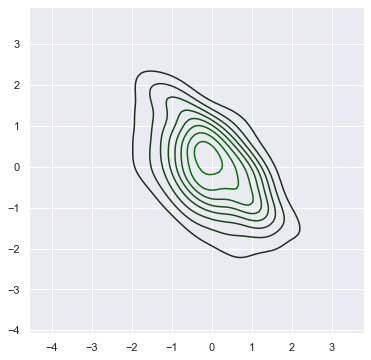

In [51]:
x, y = np.random.multivariate_normal([0,0],[[1,-0.5],[-0.5,1]], size=300).T
pal = sns.dark_palette("green",as_cmap=True)
sns.kdeplot(x, y,cmap=pal)

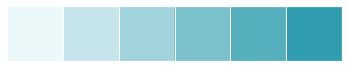

In [53]:
sns.palplot(sns.light_palette((210,90,60), input="husl"))

In [54]:
# 3 单变量分析绘图
from scipy import stats, integrate

In [55]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

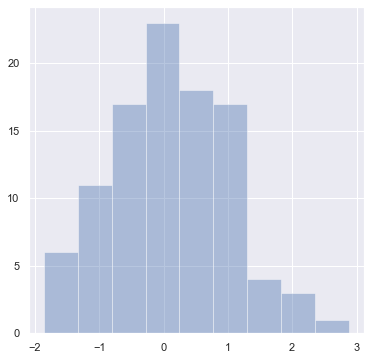

In [56]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

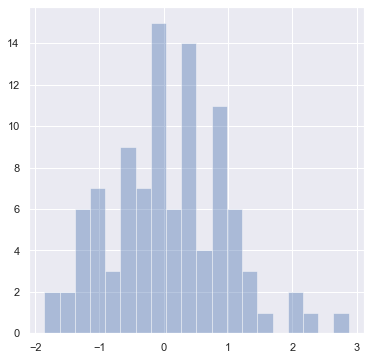

In [57]:
sns.distplot(x, bins=20,kde=False)

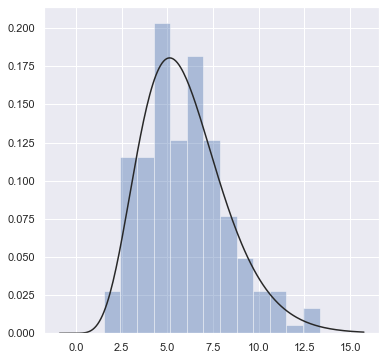

In [58]:
# 数据分布情况
x = np.random.gamma(6, size=200)
sns.distplot(x,kde=False,fit=stats.gamma) # fit：传入统计指标

In [59]:
# 根据均值和协方差生存数据
mean, cov = [0,1],[(1,0.5),(0.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x","y"])
df

,x,y
0,2.190873,2.902961
1,0.387901,3.441322
2,-1.304909,0.586173
3,-0.016867,0.907323
4,0.284953,1.189304
...,...,...
195,-0.804338,0.139381
196,1.674393,2.735944
197,-1.237634,0.002766
198,-1.044683,0.482758


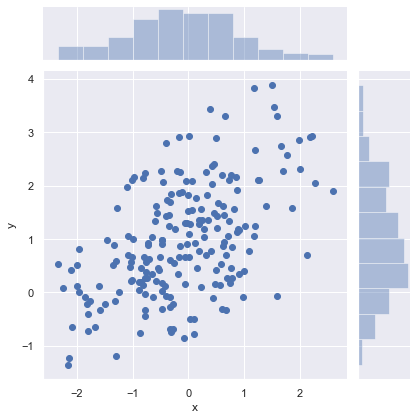

In [61]:
# 观测两个变量（特征）之间的分布关系最好用散点图
sns.jointplot(x="x",y="y",data=df)

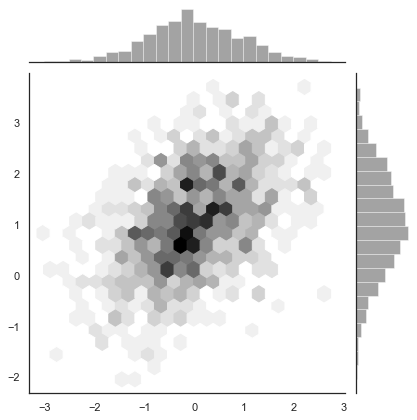

In [64]:
x, y = np.random.multivariate_normal(mean, cov,1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x,y=y, kind="hex", color="k")
# 颜色越深，当前点比较多

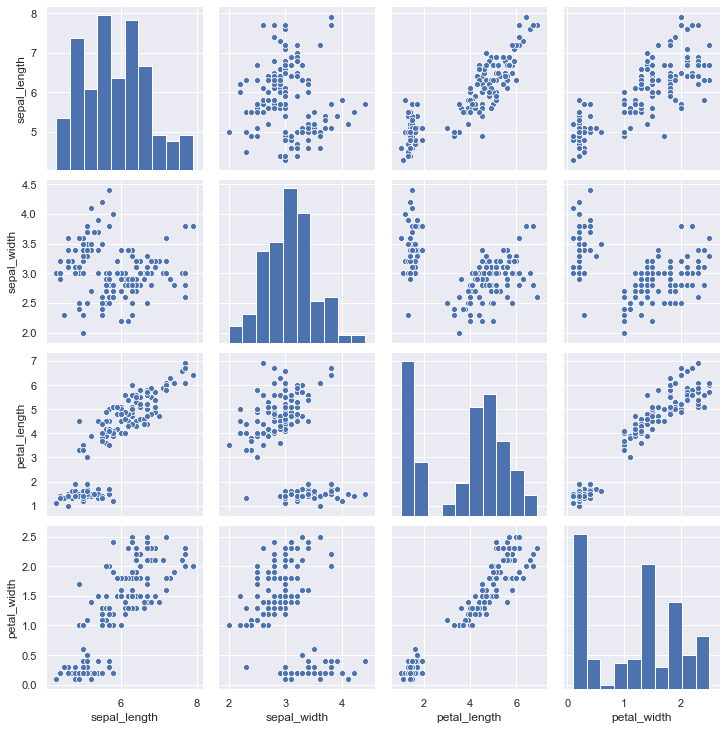

In [68]:
# 多特征显示
iris = sns.load_dataset("iris")
sns.pairplot(iris) # 将数据四个特征中两两之间的关系画出

In [73]:
# 4.回归分析绘图
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


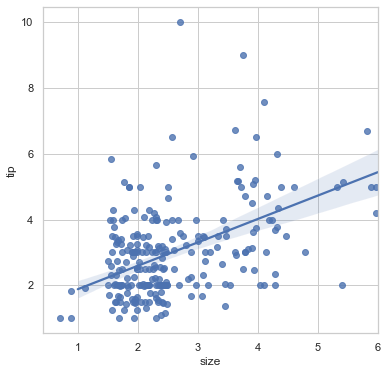

In [76]:
sns.regplot(x="size",y="tip",data=tips, x_jitter=0.5)
# sns.lmplot()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


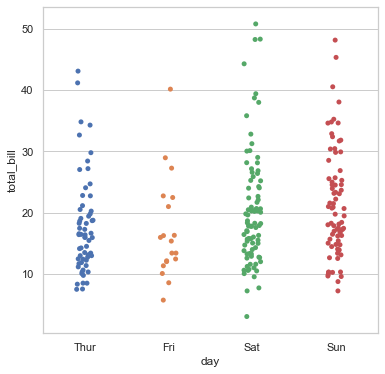

In [96]:
# 5.多变量分析绘图

sns.set(style="whitegrid",color_codes=True)

np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
# print(titanic.head())
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
# 5.1 stropplot()
sns.stripplot(x="day",y="total_bill",data=tips)

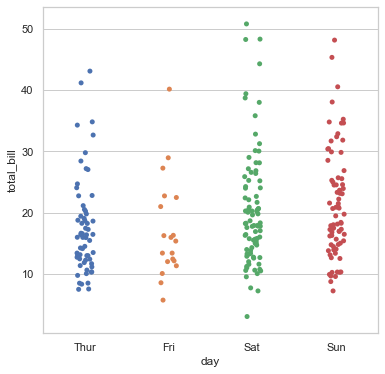

In [78]:
# 重叠是很常见的现象，但影响我们观察数据量
sns.stripplot(x="day",y="total_bill",data=tips, jitter=True)

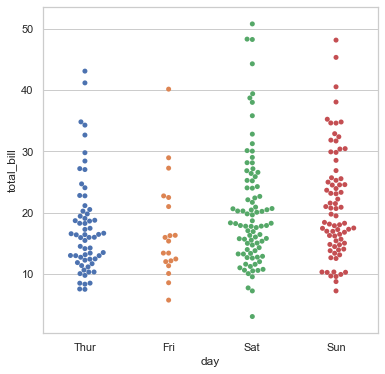

In [80]:
# 5.2 swarmplot()
sns.swarmplot(x="day",y="total_bill",data=tips)

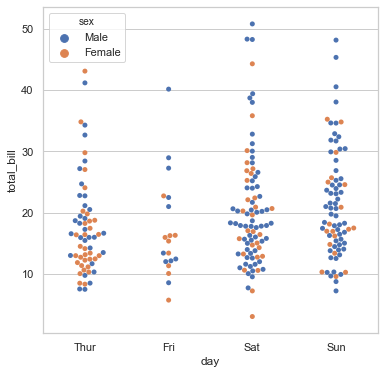

In [81]:
sns.swarmplot(x="day",y="total_bill",hue="sex", data=tips)

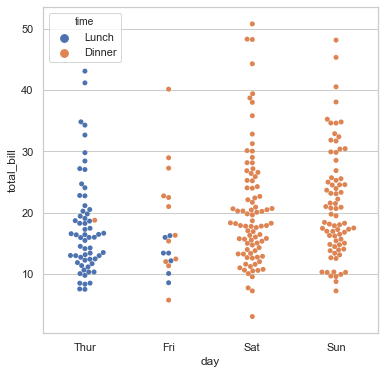

In [82]:
sns.swarmplot(x="day",y="total_bill",hue="time", data=tips)

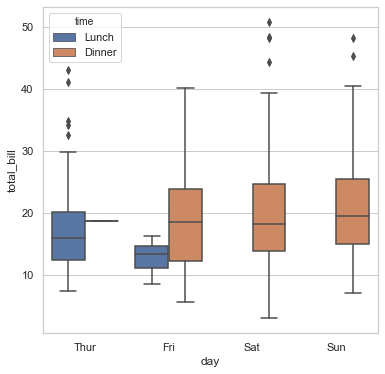

In [102]:
# 5.3 盒图--boxplot
# IQR即统计学概念四分位距，第一/四分位与第三/四分位之间的距离
# N=1.5IQR 如果一个值>Q3+N 或<Q1-N,则为离群点

sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

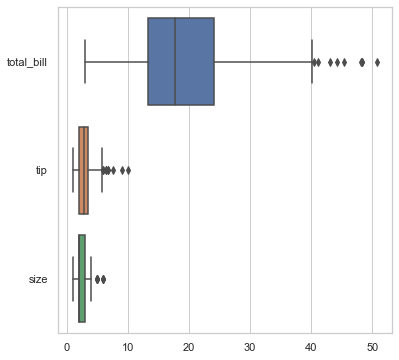

In [104]:
# 使盒图横着画-->orient="h"
sns.boxplot(orient="h", data=tips)

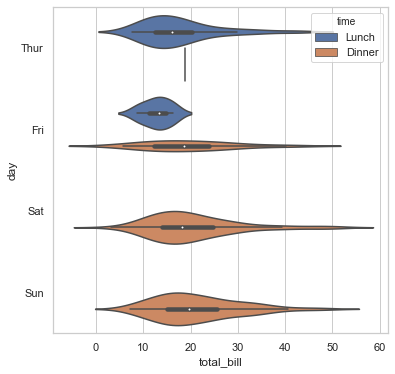

In [85]:
# 5.4 小提琴图--violinplot()
sns.violinplot(y="day", x="total_bill", hue="time", data=tips)

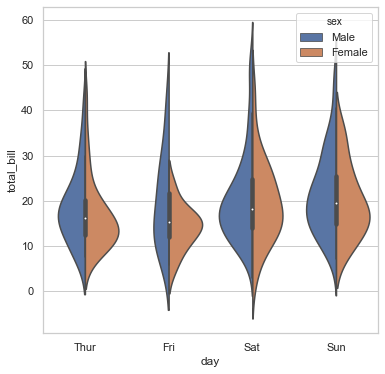

In [87]:
sns.violinplot(x="day", y="total_bill",split=True, hue="sex", data=tips)

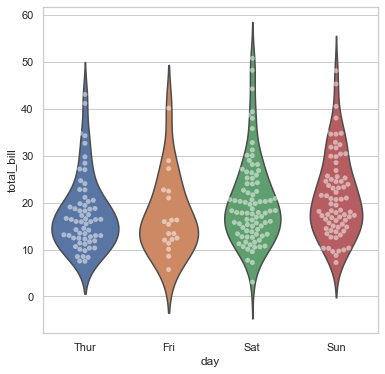

In [88]:
# 多种图进行合并
sns.violinplot(x="day", y="total_bill", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="w",alpha=0.5, data=tips)

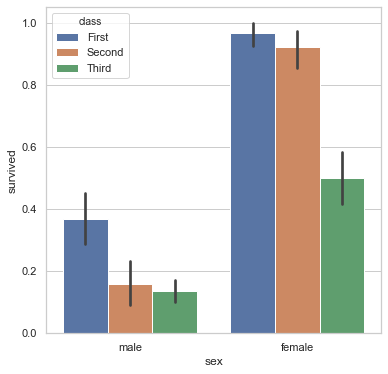

In [98]:
# 5.5 条形图--barplot()
# 显示值的集中趋势

sns.barplot(x="sex",y="survived", hue="class", data=titanic)

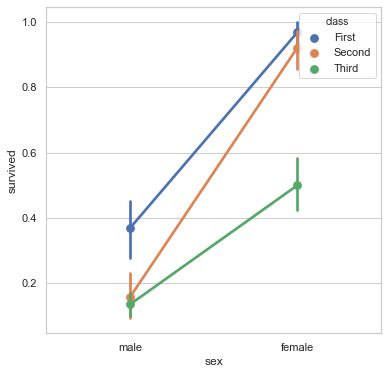

In [100]:
# 5.6 点图--pointplot()

sns.pointplot(x="sex",y="survived", hue="class", data=titanic)

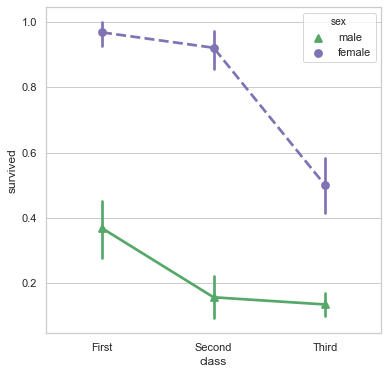

In [101]:
sns.pointplot(x="class",y="survived",hue="sex",data=titanic,
              palette={"male":"g","female":"m"},
             markers=["^","o"],linestyles=["-","--"])

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


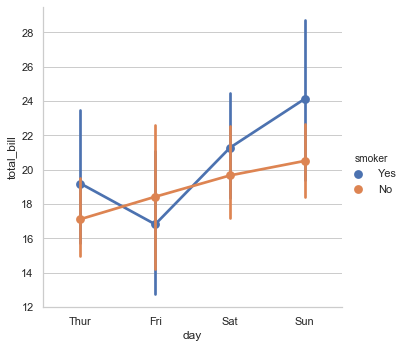

In [109]:
# 5.7 多层面板分类图-->factorplot()

sns.factorplot(x="day", y="total_bill",hue="smoker",data=tips)

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


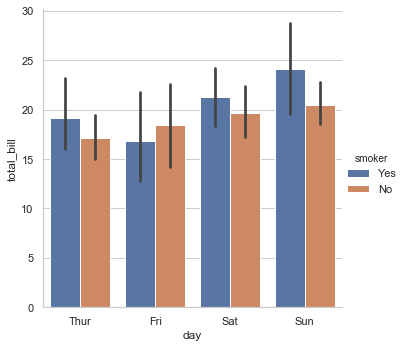

In [110]:
sns.factorplot(x="day", y="total_bill",hue="smoker",data=tips,kind="bar")

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


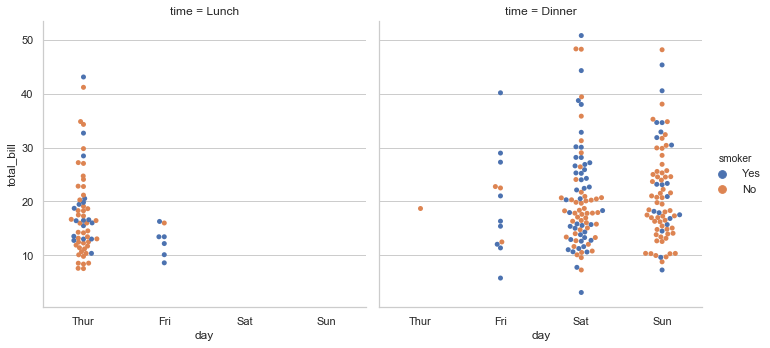

In [111]:
sns.factorplot(x="day", y="total_bill",col="time",hue="smoker",data=tips,kind="swarm")

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


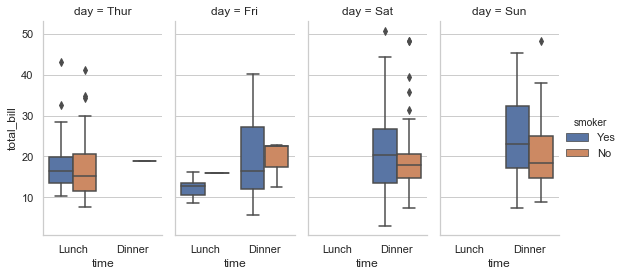

In [116]:
sns.factorplot(x="time", y="total_bill",hue="smoker",data=tips,kind="box",
              col="day",size=4,aspect=0.5)

In [117]:
# factorplot()常用的parameters：

# x,y,hue 数据集变量 变量名
# data 数据集 数据集名
# row,col 更多分类变量进行平铺显示 变量名
# col_wrap每行的最高平铺数 整数
# estimator 在每个分类中进行矢量到标量的映射 矢量
# ci 置信区间 浮点数或none
# n_boot 计算置信区间时使用的引导迭代次数 整数
# units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
# order,hue_order 对应排序列表 字符串列表
# row_order,col_order 对应排序列表 字符串列表
# kind ：可选（point默认，bar柱状图，count频次，box箱体，violin提琴，strip散点，swarm分散点，size每个面的高度（英寸）
# 标量，aspect纵横比 标量，orient方向：“v”/"h"，color颜色，matplotlib颜色 ，palette调色板：seaborn颜色色板或字典，legend hue的信息面板 True/False 
# legend_out是否扩展图形，并将信息框绘制在中心右边 True/False
# share{x,y}共享轴线 True/False）

In [119]:
# 6.FaceGrid()绘制多变量

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


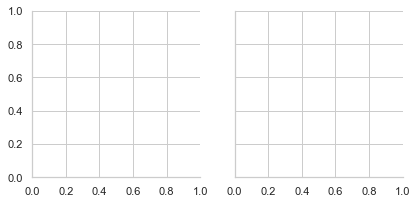

In [118]:
g = sns.FacetGrid(tips,col="time") # 先去布局，相当于占位置

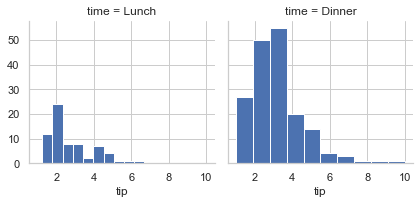

In [120]:
g = sns.FacetGrid(tips,col="time")
g.map(plt.hist, "tip")

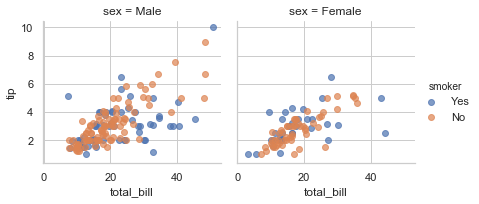

In [121]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip",alpha=0.7)
g.add_legend() # 添加图例

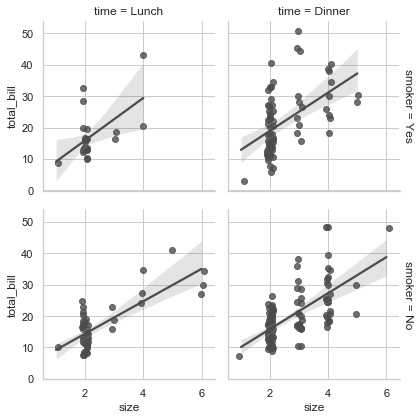

In [126]:
g = sns.FacetGrid(tips, row="smoker",col="time", margin_titles=True)
g.map(sns.regplot, "size","total_bill",color="0.3",
      fit_reg=True,# fit_reg是否显示回归线
      x_jitter=0.1)# jitter浮动

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


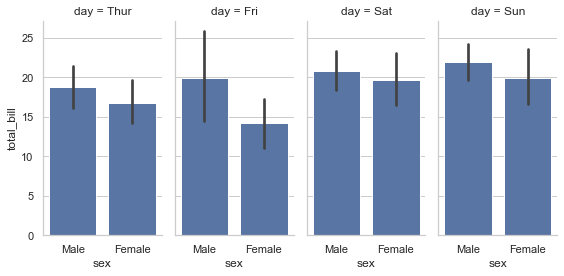

In [127]:
g = sns.FacetGrid(tips,col="day",size=4,aspect=0.5)
g.map(sns.barplot, "sex", "total_bill")

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


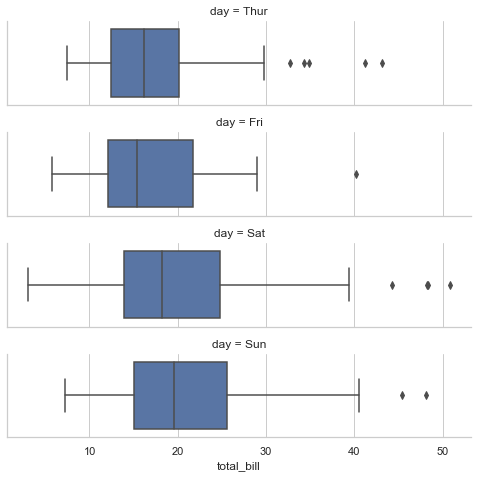

In [131]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(order_days)
# ordered_days = Categorical(["Thur","Fri","Sat","Sun"])
g = sns.FacetGrid(tips,row="day",row_order=ordered_days,
                 size=1.7,aspect=4) # size被替换成height
g.map(sns.boxplot,"total_bill")

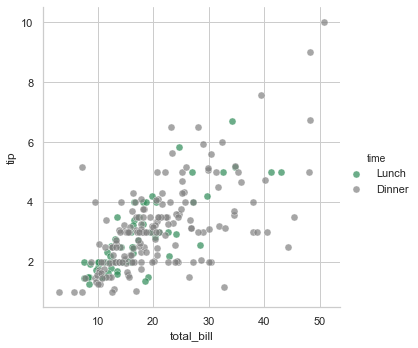

In [133]:
pal = dict(Lunch="seagreen",Dinner="gray")
g = sns.FacetGrid(tips,hue="time",palette=pal,height=5)
g.map(plt.scatter, "total_bill","tip", s=50,alpha=0.7,linewidth=0.5,edgecolor="white")
g.add_legend()

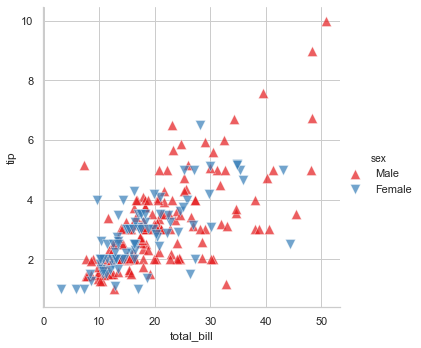

In [134]:
g = sns.FacetGrid(tips,hue="sex",palette="Set1",size=5,
                 hue_kws={"marker":["^","v"]})
g.map(plt.scatter, "total_bill","tip", s=100,alpha=0.7,
      linewidth=0.5,edgecolor="white")
g.add_legend()

/Users/susu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


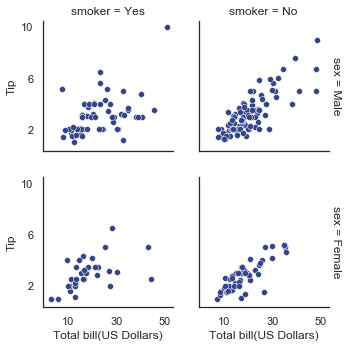

In [135]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True,
                     size=2.5)
g.map(plt.scatter, "total_bill","tip",color="#334488",edgecolor="white",lw=0.5)
g.set_axis_labels("Total bill(US Dollars)", "Tip")
g.set(xticks=[10,30,50], yticks=[2,6,10]) #x,y轴刻度范围
g.fig.subplots_adjust(wspace=0.2, hspace=0.2） # 设置子图间隔

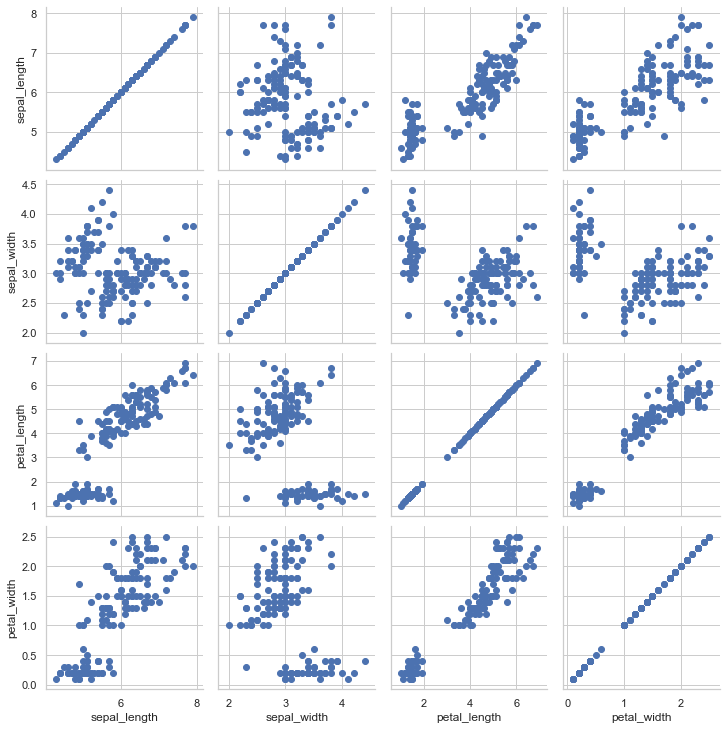

In [136]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)


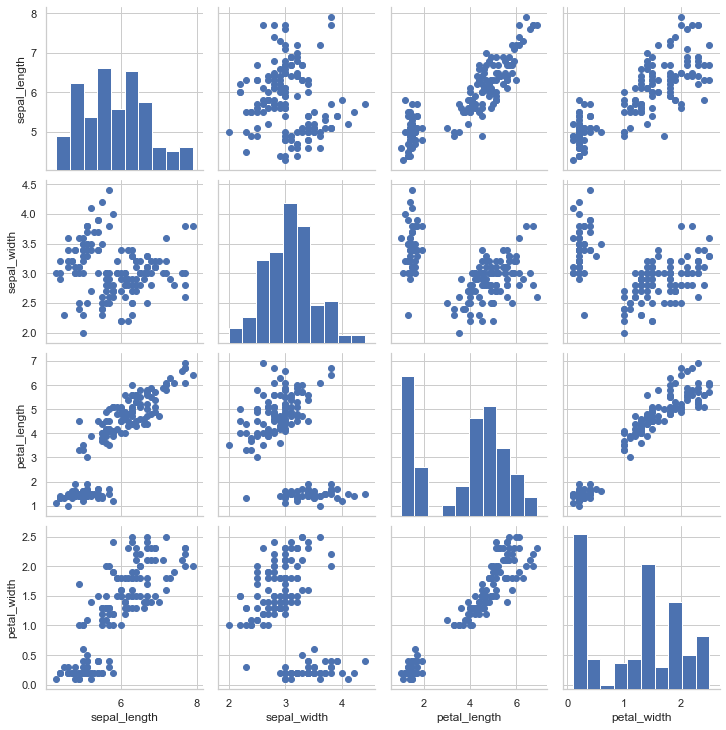

In [137]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist) # 指定对角线的图
g.map_offdiag(plt.scatter) # 指定非对角线的图

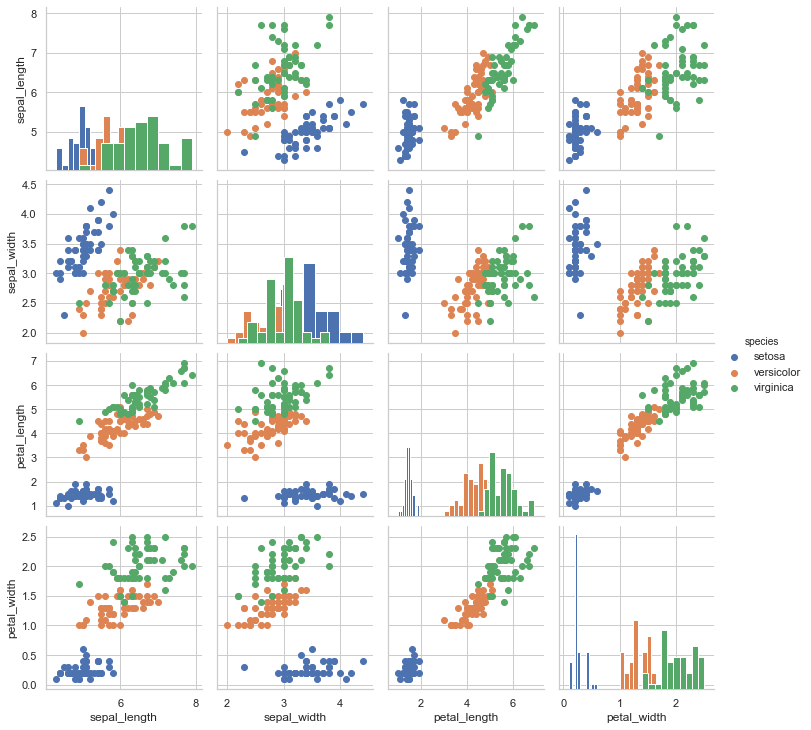

In [139]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(plt.hist) # 指定对角线的图
g.map_offdiag(plt.scatter) # 指定非对角线的图
g.add_legend()

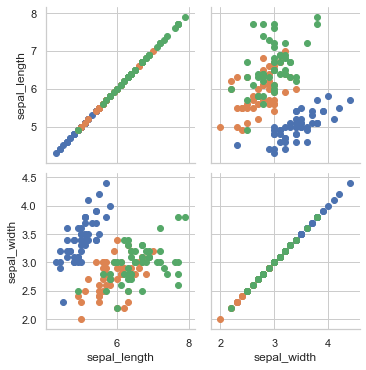

In [141]:
g = sns.PairGrid(iris,hue="species",
                 vars=["sepal_length","sepal_width"]) # vars:指定需要绘制的特征
g.map(plt.scatter)

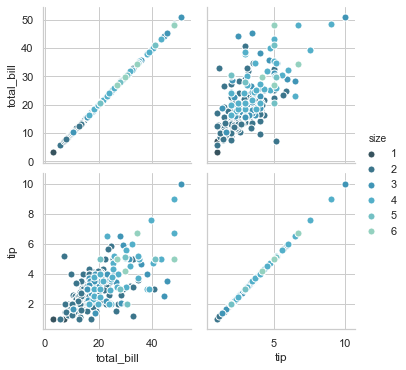

In [142]:
g = sns.PairGrid(tips,hue="size",palette="GnBu_d")
g.map(plt.scatter,s=50,edgecolor="white")
g.add_legend()

In [143]:
# 7.热度图--->heatmap()
# 常用于特征与特征的相关程度
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(0)
sns.set()

[[0.11402723 0.39613034 0.86002087]
 [0.10145661 0.06316734 0.54688621]
 [0.9487925  0.82667995 0.85134329]]


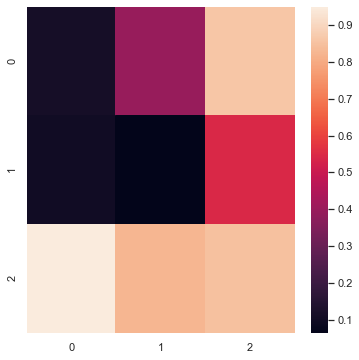

In [144]:
uniform_data = np.random.rand(3,3)
print(uniform_data)
heatmap = sns.heatmap(uniform_data)

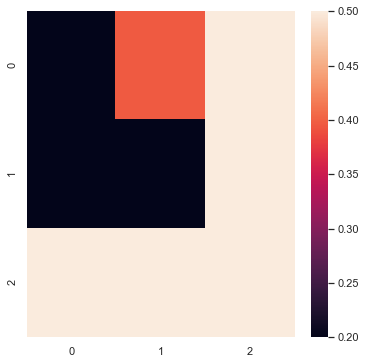

In [145]:
ax = sns.heatmap(uniform_data,vmin=0.2,vmax=0.5) # 指定color bar的范围

[[-0.51964495 -0.55467919 -1.51977748]
 [-0.95065924 -0.14189382 -0.75598294]
 [ 0.54360754  0.35617477 -0.92938628]]


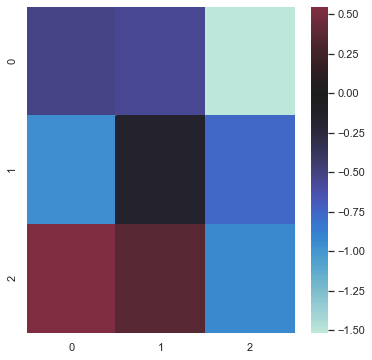

In [146]:
normal_data = np.random.randn(3,3)
print(normal_data)
ax = sns.heatmap(normal_data,center=0) # center指定中心的数据

In [158]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

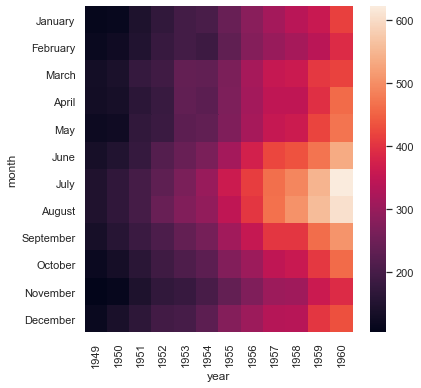

In [159]:
flights = flights.pivot("month","year","passengers")
print(flights)
ax = sns.heatmap(flights)

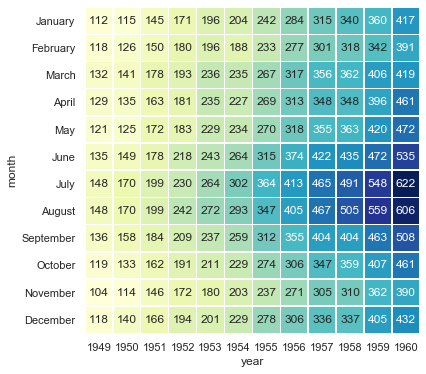

In [161]:
ax = sns.heatmap(flights,
                 annot=True,# annot将数据绘制到图上
                 fmt="d", # 指定数据的格式，比较推荐
                 linewidths=0.5, #指定格与格之间的间距
                 cmap="YlGnBu",# 指定colorbar颜色
                 cbar=False, # False为隐藏colorbar
                ) 